In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(recipes)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# Group 18: How does height, ranking point and game duration relates to the age of right-handed tennis player in 2018

# 1. Introduction:

### The Dataset:
Our project uses the dataset "atp_matches_2018.csv". It is a dataset that describes the game results of a specific tournament. The dataset provides a detailed insight of all statistics relating to that particular match.

### About Our Project:
In professional tennis, players exhibit a wide range of skills and strategies that contribute to their success on the court. Among these factors, some of the significant aspects of a player's game are their preferred hand and their physical data. For example, Rafael Nadal's left-handedness allows him to unique spin and angles, thus forehand shots disrupt opponents' rhythm (Jain, 2022). Due to the absence of sufficient data of left-handed players, in our project, we will be focused primarily on predicting the age of right-handed player based on ranking points, height and game duration. 

Players tend to accumulate more points during their peak years and fewer points as they age. Younger players may also have shorter heights as they haven't reached their peak yet (Medical News Today, 2023). Additionally, younger players' superior health often leads to better performance, potentially resulting in shorter game durations (Tanaka, 2023).

Being able to make connections and prediction of age through these predictors allows us to further rationalize the relationships, and provide the public a biref understanding of whether age would affect the performance of tennis athelets. 



### Our Project Question:
Our project will investigate how the game duration, rank points and height of tennis players correlate with the age of right-handed players. 


# Preliminary exploratory data analysis:


### Data reading
##### In the following cell, the URL for the CSV file that contains the data set "atp_matches_2018.csv" on Github was assigned to a variable called `url`. Using the `read_csv` function, `url` was read and its contents stored as player_stats. The dataset was processed to generate the displayed table. Subsequently, a descriptive label was printed below the table to provide clearer context regarding its contents.


In [2]:
url <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv"
player_stats <- read_csv(url)
head(player_stats)

Rows: 2897 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id tourney_name surface draw_size tourney_level tourney_date
1 2018-M020  Brisbane     Hard    32        A             20180101    
2 2018-M020  Brisbane     Hard    32        A             20180101    
3 2018-M020  Brisbane     Hard    32        A             20180101    
4 2018-M020  Brisbane     Hard    32        A             20180101    
5 2018-M020  Brisbane     Hard    32        A             20180101    
6 2018-M020  Brisbane     Hard    32        A             20180101    
  match_num winner_id winner_seed winner_entry ⋯ l_1stIn l_1stWon l_2ndWon
1 271       105992    NA          NA           ⋯ 47      33       19      
2 272       111577    NA          NA           ⋯ 41      25        7      
3 273       104797    NA          NA           ⋯ 53      37       29      
4 275       200282    NA          WC           ⋯ 43      33       17      
5 276       111581    NA          Q            ⋯ 35      28        5      
6 277       104999     8          NA           ⋯ 51      27        8      
  l_SvGms l_bpSaved l_bpFaced winner_rank winner_rank_points loser_rank
1 14       1         4         47         1010                52       
2  9       7        11         54          890                94       
3 15      10        16         63          809                30       
4 11       4         6        208          245                44       
5  9       0         2        175          299                68       
6 11       1         6         33         1302               218       
  loser_rank_points
1  909             
2  593             
3 1391             
4 1055             
5  755             
6  235

Table 1. A preview of the 2018 Tennis Player statistic

### Data cleaning
 To address our project question, we employed the 'grepl' function to identify a pattern indicating that all players have a winning hand condition of right-handedness. This filtering approach allows us to focus specifically on players who predominantly use their right hand for winning. A descriptive label for the table was generated and printed.

 After filtering for right-handed players in the dataframe named player_stats_righthanded, the data was organized by selecting predictors relevant to our research question: winner_rank_points, winner_ht, winner_age, and minutes. The drop_na() function was then employed to eliminate rows with missing data for these predictors. A descriptive label for the table was generated and printed for the player_stats_with_predictor dataframe.

In [15]:
player_stats_righthanded <- filter (player_stats, grepl('R', winner_hand))
head(player_stats_righthanded)

tourney_id tourney_name surface draw_size tourney_level tourney_date
1 2018-M020  Brisbane     Hard    32        A             20180101    
2 2018-M020  Brisbane     Hard    32        A             20180101    
3 2018-M020  Brisbane     Hard    32        A             20180101    
4 2018-M020  Brisbane     Hard    32        A             20180101    
5 2018-M020  Brisbane     Hard    32        A             20180101    
6 2018-M020  Brisbane     Hard    32        A             20180101    
  match_num winner_id winner_seed winner_entry ⋯ l_1stIn l_1stWon l_2ndWon
1 271       105992    NA          NA           ⋯ 47      33       19      
2 272       111577    NA          NA           ⋯ 41      25        7      
3 273       104797    NA          NA           ⋯ 53      37       29      
4 275       200282    NA          WC           ⋯ 43      33       17      
5 276       111581    NA          Q            ⋯ 35      28        5      
6 278       105238    NA          NA           ⋯ 34      22       20      
  l_SvGms l_bpSaved l_bpFaced winner_rank winner_rank_points loser_rank
1 14       1         4         47         1010               52        
2  9       7        11         54          890               94        
3 15      10        16         63          809               30        
4 11       4         6        208          245               44        
5  9       0         2        175          299               68        
6 11       1         3         38         1231               26        
  loser_rank_points
1  909             
2  593             
3 1391             
4 1055             
5  755             
6 1675

Table 2. A preview of right-handed players


In [16]:
# dropping NA values ???
player_stats_with_predictor <- select (player_stats_righthanded, winner_rank_points, winner_ht, winner_age, minutes) |>
                         drop_na()

head(player_stats_with_predictor)
print("Table 3. A preview of the cleaned dataset with the predictors")

winner_rank_points winner_ht winner_age minutes
1 1010               183       25.6       123    
2  890               188       21.2        90    
3  809               188       31.3       145    
4  245               183       18.8       104    
5  299               188       19.9        69    
6 1231               180       29.1        93

[1] "Table 3. A preview of the cleaned dataset with the predictors"


### Choosing Age Category 
 The code creates a line plot using ggplot from the player_stats_with_predictor dataframe, with the winner's age on the x-axis and their ranking points on the y-axis. For a good visualization of the graph, alpha = 0.5 was set for a semi-transparent line with x and y axis labels, a descriptive title in a legible text size. The resulting plot is then displayed. Below the plot, a label is printed for reference, indicating it as "Table 4. Winner's Age VS Ranking Points Graph".

[1] "Table 4. Winner's Age VS Ranking Points Gragh"


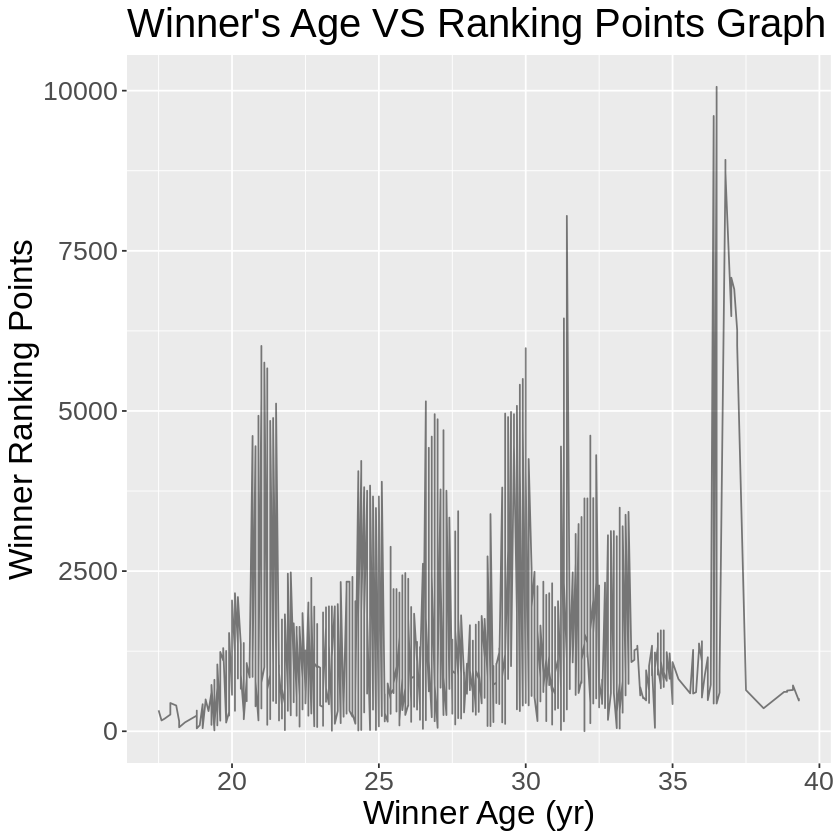

In [5]:
draft_plot <- ggplot (player_stats_with_predictor, aes(x = winner_age, y = winner_rank_points)) +
                    geom_line(alpha = 0.5) +
                    xlab("Winner Age (yr)") +
                    ylab("Winner Ranking Points") +
                    ggtitle("Winner's Age VS Ranking Points Graph") +
                    theme(text = element_text(size = 20))
draft_plot
print("Table 4. Winner's Age VS Ranking Points Gragh")

In this step, we create a graph of winner age versus ranking points to establish an age threshold for categorization. The graph reveals a distinct rise in ranking points around age 36. However, the 36 peak is not supported by enough data points, as most of the data are gathered bewteen 20-35. Therefore, we decided to take the largest rise in ranking points between 20-35 instead, which is around 31. As a result, we define the age category range as "young" for ages 0-30 and "old" for 31 or above.

As a result, the ifelse() function in the code is used to create a new column age_category in the dataset player_stats_with_predictor. It categorizes players based on their age, with the condition that if the winner_age is less than 31, the category is set as "young", otherwise it is set as "old". Additionally, the following mutation changes the age_category column from a character type to a factor type where "young" and "old" are the levels. This is all saved as stats_with_category and a descrition of the resulting table is printed.








In [17]:
stats_with_category <- player_stats_with_predictor |> 
                       mutate(age_category = ifelse(winner_age < 31, "young", "old"))|>
                       mutate(age_category = factor(age_category, levels=c("young","old")))
head(stats_with_category)
print("Table 5. A preview of the cleaned dataset with age category")

winner_rank_points winner_ht winner_age minutes age_category
1 1010               183       25.6       123     young       
2  890               188       21.2        90     young       
3  809               188       31.3       145     old         
4  245               183       18.8       104     young       
5  299               188       19.9        69     young       
6 1231               180       29.1        93     young

[1] "Table 5. A preview of the cleaned dataset with age category"


### Data Splitting

Before performing primilinary analysis, we would like to split the clean dataset into training data and testing data using the 75:25 ratio. This will help prevent data overfitting and allows for impartial parameter tuning.

The code begins by setting the seed for reproducibility. Then, it splits the stats_with_category dataset into training and testing sets using the 75-25 split ratio. The strata argument is used to ensure that the split in both training and testing set maintains the same proportion of the winner_age variable, which helps maintain the distribution of ages. Finally, displays a preview of the training set using the head() function and labeled as "Table 3."

In [7]:
set.seed(99)

player_split <- initial_split(stats_with_category, prop=0.75, strata=winner_age)
player_training <- training(player_split)
player_testing <- testing(player_split)

head(player_training)
print("Table 3. A preview of the training set")

winner_rank_points winner_ht winner_age minutes age_category
1  245               183       18.8       104     young       
2  844               188       21.6        99     young       
3  992               188       22.9       150     young       
4  245               183       18.8        94     young       
5  299               188       19.9       152     young       
6 2010               193       22.6       132     young

[1] "Table 3. A preview of the training set"


### Summary Table

A summary table was genereated based on the training data. Players were grouped by age category with 'young' and 'old' as the categories. Then, summary statistics within each age category were generated, including the count of players (number_count), the mean height of the winners (mean_height), the mean ranking points (mean_rank_points), and the mean game time in minutes (mean_game_time). With the summary table produced, a descriptive label was generated.

The summary table demonstrates the mean of each predictors with respect to the age category players belong to. According to the table, older players have less counts compared to young players. However, we eventually decided not to manipulate the data. The k-nn algorithm only becomes inaccurate when there's a significant shortage of data. While 464 is fewer than 1355, it's not significantly small enough to impact the k-nn algorithm. Therefore, to maintain the integrity of the project's data, we opted to keep it unchanged.

From the summary table, it is interesting to see that while the means of height of young and old category are relatively similar, older players tend to have a much higher mean rank points, and a slightly higher mean game time than younger players. 

In [8]:
summary_table <- player_training |>
                 group_by(age_category)|>
                 summarize (number_count = n(),
                            mean_height = mean(winner_ht),
                            mean_rank_points = mean(winner_rank_points),
                            mean_game_time = mean(minutes))
summary_table
print("Table 6. Summary Table Of The Mean Of Predictor Based On The Age Category")

age_category number_count mean_height mean_rank_points mean_game_time
1 young        1355         187.3675    1468.399         110.4723      
2 old           464         188.2888    2067.170         112.7284

[1] "Table 6. Summary Table Of The Mean Of Predictor Based On The Age Category"


### Data Visualization
To compare the time it took for a 'old' or 'young' player to win with respect to the winner's number of rank points in the training data, two scatter plots were generated to visualize this data. The first scatter plot contained the game time vs winner's rank points for both 'old' and 'young' categories, while the second scatter plot separated each category with separate scatter plots. This allowed for analysis of the distribution of "young" and "old" players.

Using the ggplot function, the minutes for the player to win and the number of rank points for the winner were used for the x and y axis  respectively. Each age category point was represented with colours, blue for 'old' and red for 'young'. Labels fpr both x and y axis, colours and title were included for a better visualization product. These layers of the graph were saved to Time_Rank_plot before the code facet_grid(rows=vars(age_category)) was used toe generate the second graph. It split the Time_Rank_plot into separate panels based on the levels of the age_category variable, allowing for comparison between different age groups in a single plot. This was saved to a dataframe called time_rank_facet. 

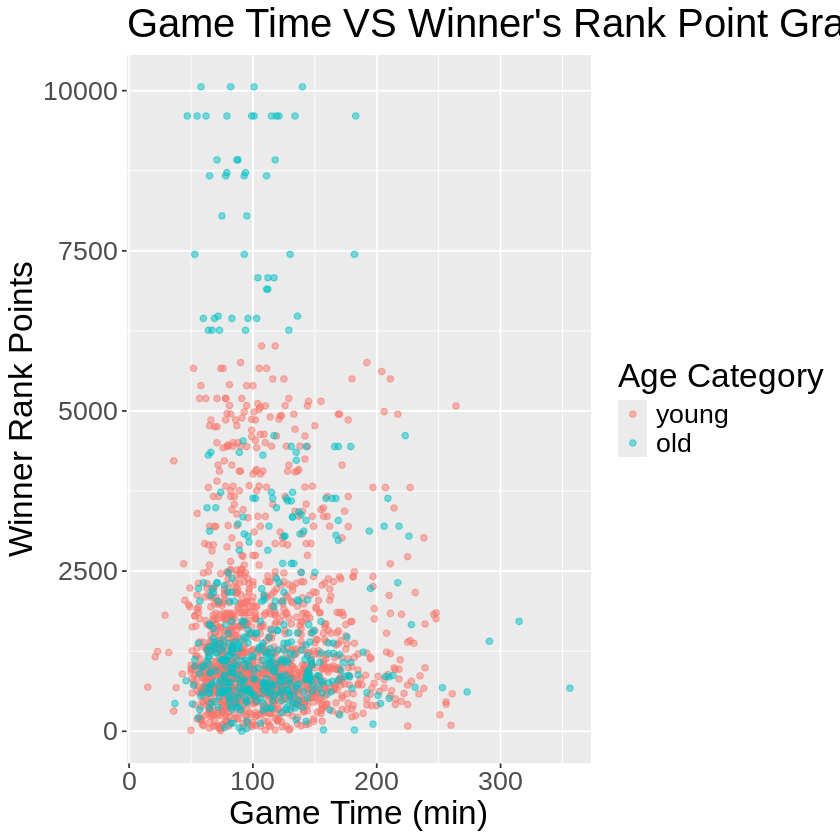

[1] "Table 7. Game Time VS Winner's Rank Point Gragh"


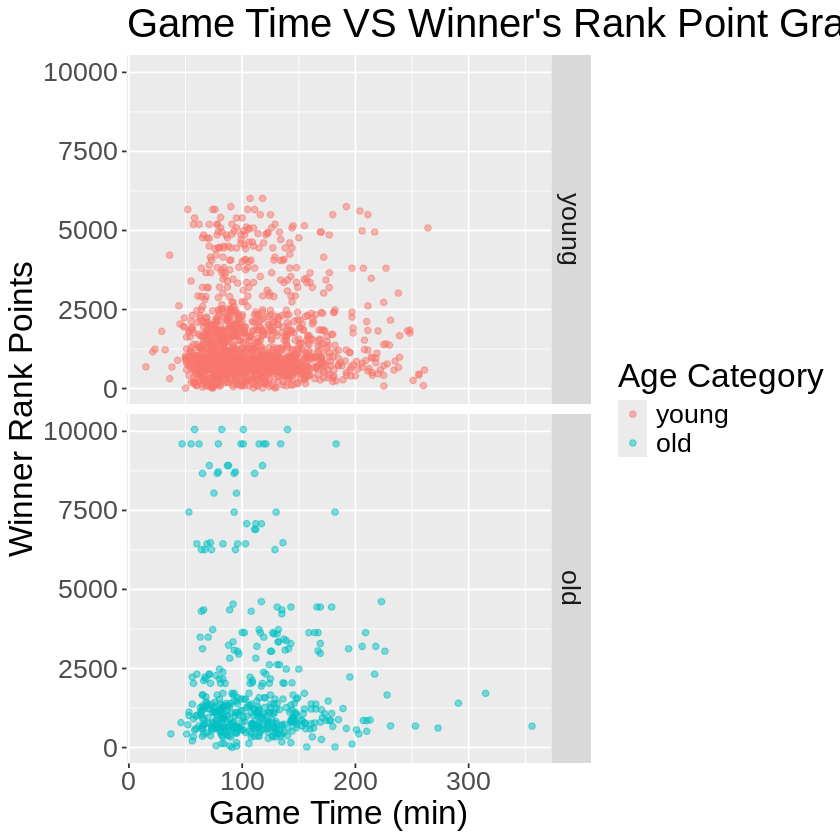

In [9]:
Time_Rank_plot <- ggplot (player_training, aes(x = minutes, y = winner_rank_points)) +
                    geom_point(alpha = 0.5, aes(color = age_category)) +
                    xlab("Game Time (min)") +
                    ylab("Winner Rank Points") +
                    labs(colour = "Age Category") +
                    ggtitle("Game Time VS Winner's Rank Point Gragh") +
                    theme(text = element_text(size = 20))
Time_Rank_plot

time_rank_facet <- Time_Rank_plot +
    facet_grid(rows=vars(age_category))
time_rank_facet

print("Table 7. Game Time VS Winner's Rank Point Gragh")

The graph shows older players tend to have higher rank points (blue points in upper left-middle), while younger players tend to have lower rank points (red points in bottom left-middle), possibly due to older players' better skills and experience. Game duration for young players mostly falls within 50-200 minutes, while for older players, it spans 50-250 minutes, possibly reflecting differences in physical health and reaction time.

A scatter plot for Game Time VS. Winner's Height was generated to analyze and compare between the two age categories. Using the ggplot function, the minutes for the player to win and the height in centimeters for the winner were used for the x and y axis  respectively. Each age category point was represented with colours, blue for 'old' and red for 'young'. Labels for both x and y axis, colours and title were included for a better visualization product. These layers of the graph were saved to Time_Height_plot before the code facet_grid(rows=vars(age_category)) was used toe generate the second graph. It split the Time_Height_plot into separate panels based on the levels of the age_category variable, allowing for comparison between different age groups in a single plot. This was saved to a dataframe called time_height_facet. 

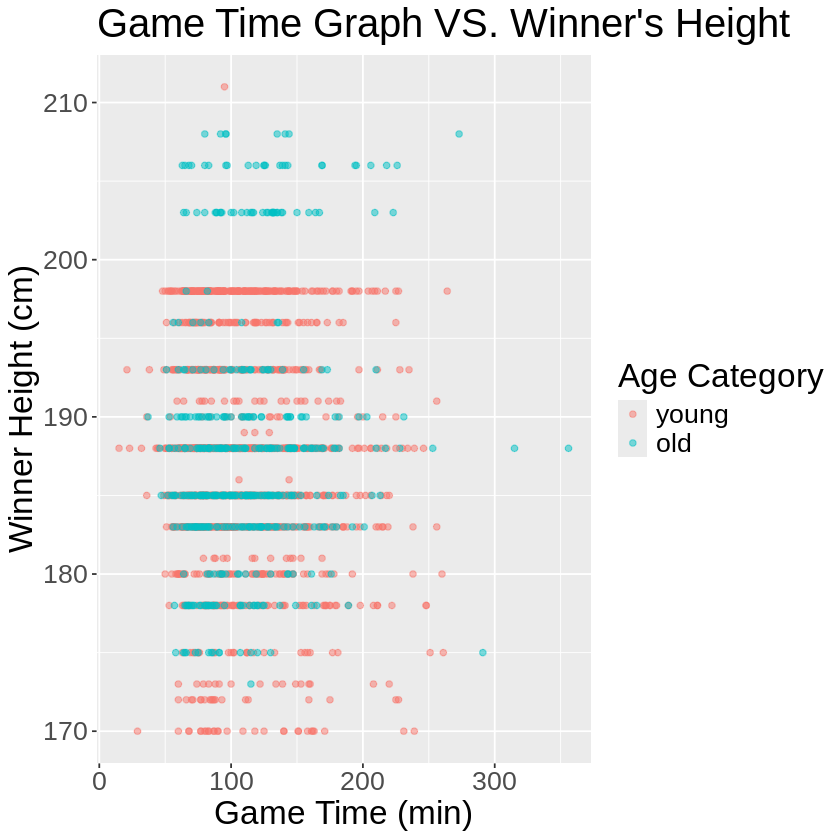

[1] "Table 8. Game Time Gragh VS. Winner's Height"


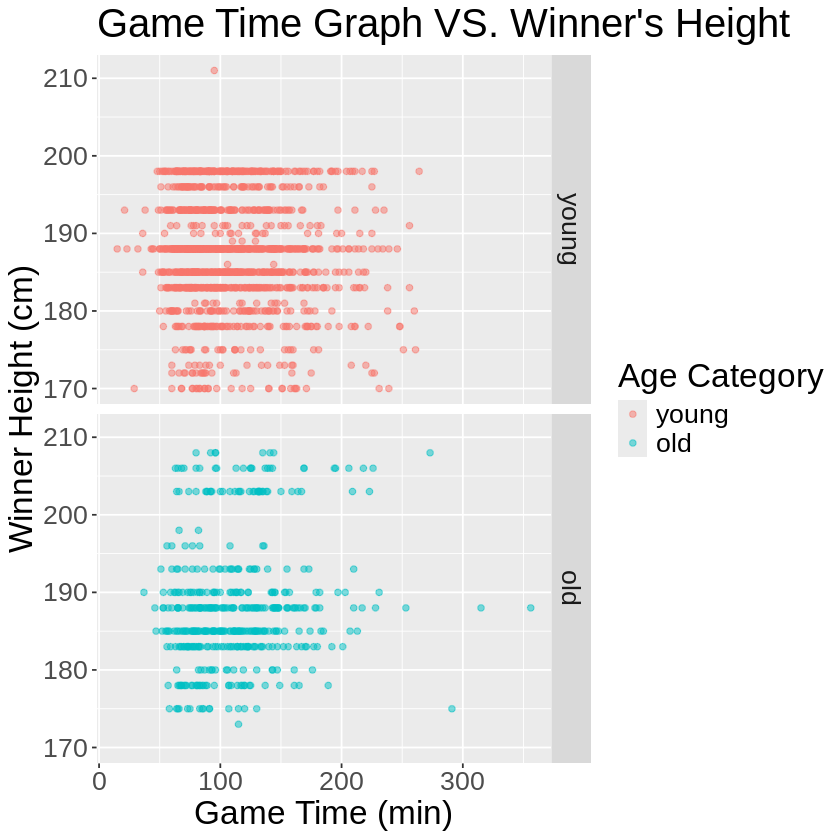

In [10]:
Time_Height_plot <- ggplot (player_training, aes(x = minutes, y = winner_ht)) +
                    geom_point(alpha = 0.5, aes(color = age_category)) +
                    xlab("Game Time (min)") +
                    ylab("Winner Height (cm)") +
                    labs(colour = "Age Category") +
                    ggtitle("Game Time Graph VS. Winner's Height") +
                    theme(text = element_text(size = 20))
Time_Height_plot

time_height_facet <- Time_Height_plot +
    facet_grid(rows=vars(age_category))
time_height_facet

print("Table 8. Game Time Gragh VS. Winner's Height")

In the Game Time versus Winner Height Graph, red points cluster towards the left and bottom and middle sections, while blue points concentrate towards the upper and middle sections. This indicates that younger players generally have slightly lower heights compared to older players, possibly due to ongoing growth among players around 20 years old, whose recorded height may not be permanent at the time of data collection.


Upon analyzing the predictors' relationship with age, it's evident that height, game time, and rank points could serve as potential predictors for estimating the age of players, as they exhibit significant associations.

age_category mean             count    
1 young        mean_height       187.3675
2 young        mean_rank_points 1468.3993
3 young        mean_game_time    110.4723
4 old          mean_height       188.2888
5 old          mean_rank_points 2067.1703
6 old          mean_game_time    112.7284

[1] "Table 9. Modified Summary Table"


age_category mean             count    
1 young        mean_height       187.3675
2 young        mean_rank_points 1468.3993
3 young        mean_game_time    110.4723

[1] "Table 10. Modified Summary Table for Young Players"


age_category mean             count    
1 old          mean_height       188.2888
2 old          mean_rank_points 2067.1703
3 old          mean_game_time    112.7284

[1] "Table 11. Modified Summary Table for Old Players"
[1] "Table 12. Comparision Table of the Mean of Each Predictors for Old and Young People"


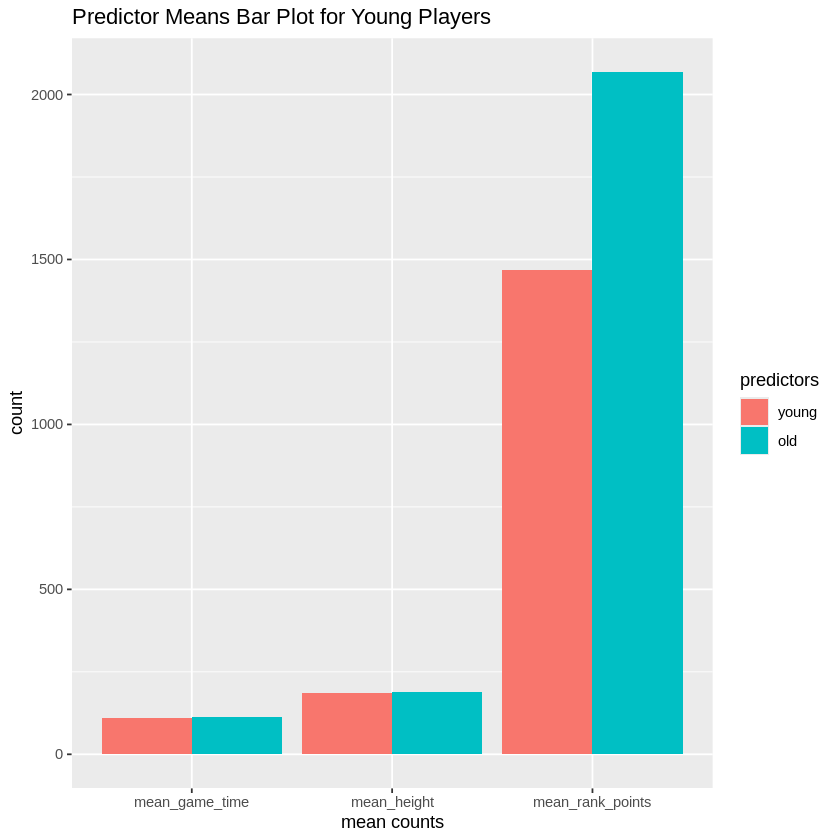

In [11]:
updated_summary_step_1 <- pivot_longer (summary_table, cols = mean_height:mean_game_time, 
                                names_to = "mean", values_to = "count")


updated_summary_step_2 <- select(updated_summary_step_1, age_category, mean, count)
updated_summary_step_2
print("Table 9. Modified Summary Table")


young_summary <- filter(updated_summary_step_2, age_category == "young")
old_summary <- filter(updated_summary_step_2, age_category == "old")
young_summary
print("Table 10. Modified Summary Table for Young Players")
old_summary
print("Table 11. Modified Summary Table for Old Players")

histogram_visualization <- ggplot (updated_summary_step_2, aes(x = mean, y = count, fill = age_category)) +
                           geom_bar (stat = "identity", position="dodge") +
                           xlab("mean counts") +
                           labs(fill = "predictors") +
                           ggtitle("Predictor Means Bar Plot for Young Players")


histogram_visualization
print("Table 12. Comparision Table of the Mean of Each Predictors for Old and Young People")

### Training Model

In model training process, we would use the k-nn algorithm to perform our four-predictor classification in predicting the age of players. From this analysis, we will use confusion matrix to evaluate the model (training data)'s performance towards the testing set.

The code sets the seed to 997 for reproducibility of the following codes, then performed k-nearest neighbors classification using cross-validation with 5 folds `vfold_cv` and stratification based on the `age_category` variable, ensuring that each fold contains proportional representation of the age_category variable. The latter function creates a tibble named player_vals with one column named neighbors. The column contains integers ranging from 1 to 50, inclusive. Each integer represents a different number of neighbors to be evaluated during tuning process for the k-nearest neighbors model.

A recipe is created specifying the predictors and outcome variable, followed by scaling and centering of predictors. The nearest neighbor model is specified with the "kknn" engine and classification mode. 

A workflow is created with the model added to specify how the data should be preprocessed before modeling, the type of model used with its settings and a grid search is performed to tune the number of neighbors using cross-validated accuracy as the metric. The results are collected and filtered to obtain accuracy estimates for different numbers of neighbors.

The accuracy versus number of neighbors is plotted, showing the relationship between the number of neighbors and the accuracy estimate. Finally, the model is fit with the optimal number of neighbors using the entire training dataset.

[1] "Table 9. Accuracy VS Neighbors Gragh"


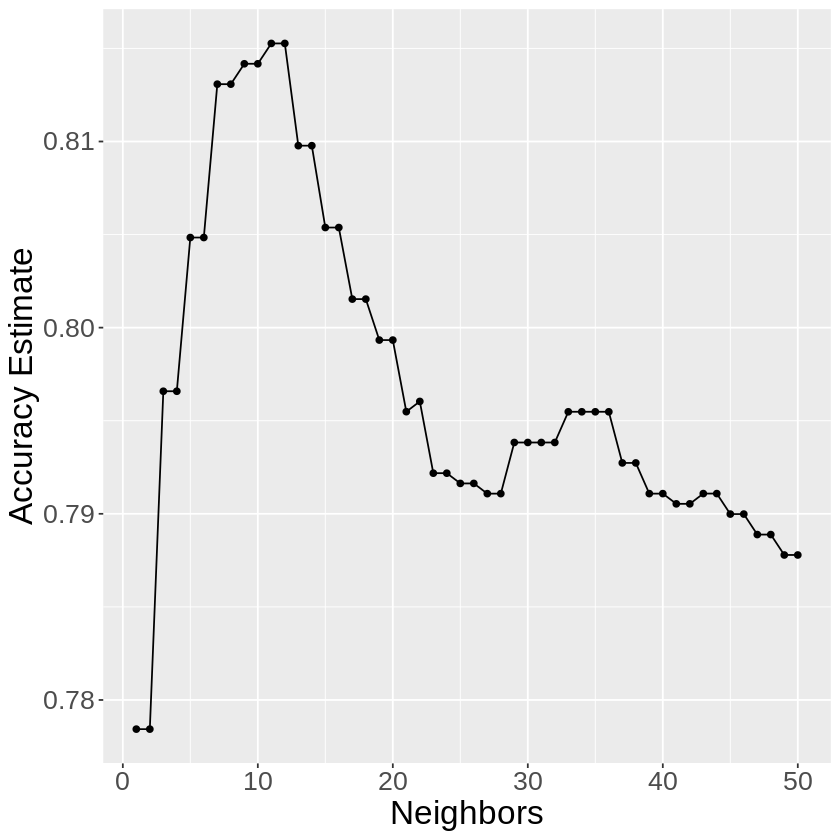

In [12]:
set.seed(997)

player_vfold <- vfold_cv(player_training, v = 5, strata = age_category)
player_vals <- tibble(neighbors = 1:50)


player_recipe <- recipe(age_category ~ winner_ht + minutes + winner_rank_points, data = player_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
               set_engine("kknn")|>
               set_mode("classification")

player_final_results <- workflow() |>
                       add_recipe(player_recipe) |>
                       add_model(player_spec) |>
                       tune_grid(resamples = player_vfold, grid = player_vals) |>
                       collect_metrics()

accuracies <- player_final_results |>
              filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate") +
                     theme(text = element_text(size = 20)) 
                
accuracy_versus_k
print("Table 9. Accuracy VS Neighbors Gragh")

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
               set_engine("kknn")|>
               set_mode("classification")

player_fit <- workflow() |>
              add_recipe(player_recipe) |>
              add_model(player_spec) |>
              fit(data = player_training)


From observing the Accuracy VS. Neighbors Gragh, a sharp rise is demonstrated at k=11. Therefore, we would use k=11 for the final model. 

# Model Evaluation

In [13]:
player_recipe_prep <- prep(player_recipe, training = player_training)


player_testing_prepared <- bake(player_recipe_prep, new_data = player_testing)


predictions <- predict(player_fit, new_data = player_testing_prepared)
results <- bind_cols(player_testing, predictions)

accuracy <- metrics(results, truth = age_category, estimate = .pred_class)|>
         filter(.metric == "accuracy")

accuracy


.metric  .estimator .estimate
1 accuracy binary     0.7483553

Given the accuracy of 74.84%, it suggests that the model is fairly good at predicting the age category based on the available predictors (height, game duration, and rank points).

# 3. Discussion

### What do you expect to find?

We expect to accurately predict player’s age based on the the predator height, game time and rank points.

### What impact could such findings have?

The impact of the model's findings has multifaceted implications for the world of tennis, particularly in how various stakeholders approach the development, management, and promotion of athletes. Firstly, the ability to predict a player's career trajectory based on height, ranking points, and game duration has significant potential to refine training programs. Coaches could potentially design personalized regimens that cater to an individual's predicted career arc, thereby optimizing their performance at different stages of their career. This sort of strategic training and development is crucial for maximizing an athlete's potential and extending their competitive lifespan in the sport.

Additionally, the predictive power of the model can be leveraged for more nuanced player management. With insights into the physical condition of players as they age, coaches and managers could strategically plan tournament schedules and training intensity. Such customization ensures that players are not overburdened at points when they might be more susceptible to injury or fatigue, ultimately safeguarding their well-being and continuity in the sport.

From a recruitment and investment standpoint, the findings offer valuable predictive insights that can guide teams and sponsors in making decisions. Investing in players whose age-related performance projections align with long-term strategic goals could lead to more successful and financially prudent partnerships. The ability to predict a player's future performance based on current attributes allows for a more informed selection process that looks beyond immediate results.

The model also contributes to the ongoing conversation about the physical dynamics of tennis players. By providing empirical evidence, it may confirm or challenge existing stereotypes about age-related performance in tennis. This not only has implications for player development and coaching but also contributes to the scientific understanding of athlete physiology and its relationship with competitive sports performance.


### What future questions could this lead to?

- Can we use height to predict rankings of left-handed players?
- If height is a predictor, can weight also affect a player's ranking? (as they combined to perform calculations of BMI)
- Depending on the relationship seen, will these results affect a new player's interest in pursueing a professional career?
-  Is there a different pattern of performance for left-handed players, and does cross-dominance (the hand used for playing vs. the hand used for other tasks) play a role in player performance?
-  Could incorporating other physical measures, such as weight or even genetic markers, provide a more complete predictive model for player performance?
-  What factors contribute most significantly to the length and success of a player's career, and how can these be influenced or optimized?
-  As players age, how do their playing techniques evolve, and can changes in technique be predictive of career phase transitions?
-  Could insights from the model influence how young talents are nurtured, focusing on attributes that might predict a longer peak performance phase?



# References: 

Jain, P. (July, 2022). Why does Rafael Nadal play left-handed? Find out what else can the Grand Slam record-holder do with his left hand. Sportskeeda. https://www.sportskeeda.com/tennis/news-why-rafael-nadal-play-left-handed-find-else-can-grand-slam-record-holder-left-hand#

Sissons, C. (December, 2023). What age do boys stop growing?. Medical News Today. https://www.medicalnewstoday.com/articles/320676

Tanaka, H. Toussaint, J-F. (Feburary, 2023). Editorial: Growth, peaking, and aging of competitive athletes.     
doi: 10.3389/fphys.2023.1165223 
